In [9]:
%load_ext autoreload
%autoreload 2

import pyattimo
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# load a dataset, any list of numpy array of floats works fine
# The following call loads the first 100000 points of the ECG 
# dataset (which will be downloaded from the internet)
ts = pyattimo.load_dataset('ecg', prefix=1_000)
series = ts.flatten()
ds_name = "ECG"

print("Size of DS: ", series.shape)

Size of DS:  (1000,)


In [14]:
# Now we can find k-motiflets:
#  - w is the window length
#  - repetitions is the number of LSH repetitions
start = time.time()

max_k = 20
m_iter = pyattimo.MotifletsIterator(
    ts, w=20, max_k=max_k
)

for m in m_iter:
    print(m.indices)    
    print(m.extent)
    # np.sort(m.indices)
    
end = time.time()
print("Discovered "+str(max_k)+" motiflets in", end - start, "seconds")    

[544, 628]
0.11680376834128231
[548, 628, 648]
0.6547372353206112
[44, 156, 220, 492]
0.6925455022292084
[44, 156, 220, 492, 516]
1.380067364073673
[112, 164, 520, 556, 648, 668]
1.965232525615315
[12, 48, 164, 300, 520, 636, 656]
2.397793056116386
[48, 162, 224, 520, 556, 616, 640, 668]
2.598315400067366
[9, 111, 160, 225, 519, 544, 628, 648, 668]
2.9555020961122307
[9, 111, 160, 225, 298, 519, 544, 628, 648, 668]
2.9555020961122307
[0, 52, 163, 224, 520, 554, 616, 640, 662, 726, 881]
3.470114406845933
[11, 112, 163, 225, 298, 519, 547, 614, 634, 654, 674, 695]
3.5536299664866755
[12, 48, 160, 224, 280, 300, 380, 420, 520, 556, 631, 652, 880]
3.6604227895958807
[12, 48, 160, 224, 280, 300, 357, 380, 420, 520, 556, 631, 652, 726, 880]
3.931676662595678
[12, 48, 160, 224, 280, 300, 380, 420, 520, 556, 631, 652, 726, 880]
3.931676662595678
[4, 53, 167, 224, 299, 359, 383, 468, 548, 615, 636, 661, 683, 703, 727, 882]
3.98223224859271
[2, 48, 162, 224, 300, 383, 469, 521, 550, 618, 642, 66

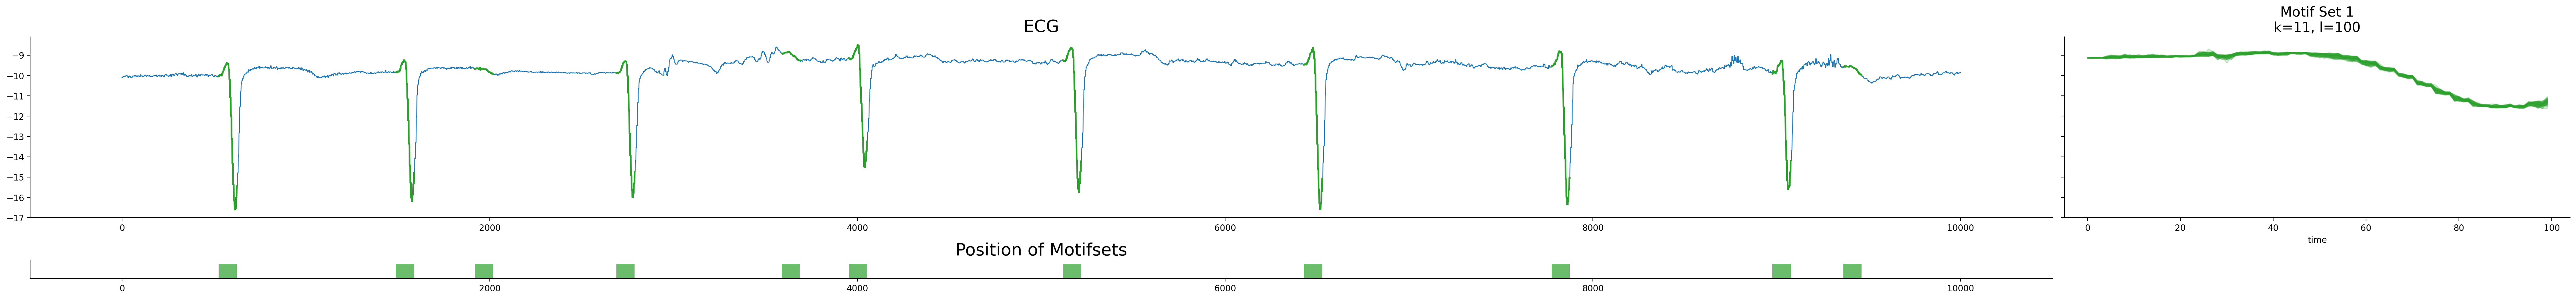

(<Figure size 4200x500 with 3 Axes>,
 array([[<Axes: title={'center': 'ECG'}>,
         <Axes: title={'center': 'Motif Set 1\nk=11, l=100'}, xlabel='time', ylabel='value'>],
        [<Axes: title={'center': 'Position of Motifsets'}>, <Axes: >]],
       dtype=object))

In [6]:
motifs = [[525, 1489, 1920, 2689, 3588, 3953, 5117, 6429, 7775, 8977, 9363]]

plot_motifsets(
    ds_name,
    series,
    motifsets=motifs,
    motif_length=100)

In [ ]:
k=10
mot = Motiflets("ECG", series)
_ = mot.fit_k_elbow(k, 1000)

In [ ]:
print(np.sort(mot.motiflets[-1]))
print(mot.dists[-1])

In [ ]:
D_full, knns = ml.compute_distance_matrix(series.to_numpy(), 1000, 1)

In [ ]:
print(D_full.shape)
dim_index = np.zeros((D_full.shape[1], 1), dtype=np.int32)

In [ ]:
pos = np.sort(m.indices)
print(pos)

ml.get_pairwise_extent(D_full, pos, dim_index)**2
